# fashion-mnist 데이터 셋으로 cnn 모델 개발

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [3]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()

In [6]:
# 데이터 확인
print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))
print(X_train.min(), X_train.max(), y_train.min(), y_train.max())

(60000, 28, 28) (60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
0 255 0 9


In [8]:
# 데이터 스케일링
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [ ]:
# cnn자체에는 드롭아웃을 잘 쓰지 않는다.
# 드롭아웃은 풀링 후, 배치정규화는 렐루 전에 입력전에 처리conv와 activation 분할해서 그 사이에 넣으면 된다.

In [30]:
# 모델 구조 설계

model = tf_keras.models.Sequential()

model.add(tf_keras.layers.Input(shape=(28, 28, 1)))

model.add(tf_keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_uniform'))
model.add(tf_keras.layers.BatchNormalization())
model.add(tf_keras.layers.Activation('relu'))
model.add(tf_keras.layers.MaxPooling2D(pool_size=2))
model.add(tf_keras.layers.Dropout(0.05))

model.add(tf_keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_uniform'))
model.add(tf_keras.layers.BatchNormalization())
model.add(tf_keras.layers.Activation('relu'))
model.add(tf_keras.layers.MaxPooling2D(pool_size=2))
model.add(tf_keras.layers.Dropout(0.05))

model.add(tf_keras.layers.Flatten())
model.add(tf_keras.layers.Dense(128, kernel_initializer='he_uniform'))
model.add(tf_keras.layers.BatchNormalization())
model.add(tf_keras.layers.Activation('relu'))
model.add(tf_keras.layers.Dropout(0.5))

model.add(tf_keras.layers.Dense(64, kernel_initializer='he_uniform'))
model.add(tf_keras.layers.BatchNormalization())
model.add(tf_keras.layers.Activation('relu'))
model.add(tf_keras.layers.Dropout(0.5))

model.add(tf_keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 430,410 (1.64 MB)

 Trainable params: 429,834 (1.64 MB)

 Non-trainable params: 576 (2.25 KB)

In [31]:
# 모델 학습 설계
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [32]:
# 모델 학습
fit_history = model.fit(X_train_scaled, y_train, batch_size=256, epochs=20, validation_split=0.2)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.6162 - loss: 1.1761 - val_accuracy: 0.7997 - val_loss: 0.5744
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8320 - loss: 0.5229 - val_accuracy: 0.8857 - val_loss: 0.3209
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8667 - loss: 0.4087 - val_accuracy: 0.8948 - val_loss: 0.2895
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8814 - loss: 0.3589 - val_accuracy: 0.9066 - val_loss: 0.2611
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8904 - loss: 0.3303 - val_accuracy: 0.9072 - val_loss: 0.2547
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8973 - loss: 0.3072 - val_accuracy: 0.9056 - val_loss: 0.2581
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9063 - loss: 0.2836 - val_accuracy: 0.9162 - val_loss: 0.2310
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9101 - loss: 0.2701 - val_accuracy:

In [33]:
print(model.evaluate(X_train_scaled, y_train), model.evaluate(X_test_scaled, y_test))
# dropout 모두 사용 : 0.9816833138465881, 0.9258000254631042 > 일반화 성능이 제일 높으므로 가장 낫다고 판단할 수 있다.
# 완전연결층에서만 dropout사용 : 0.961816668510437, 0.9082000255584717
# 완전연결층에서만 do 사용 + 가중치 초기화 : 0.9743499755859375, 0.9144999980926514
# dropout모두 사용 + 가중치 초기화 : 0.9590333104133606, 0.9190999865531921
# conv층에서는 과대적합이 잘 안일어남. 그런데도 전층에 do걸어서 이렇다면, conv층에서는 드롭아웃 걸지말고 필터를 줄이는것도 한 방법

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9675 - loss: 0.0926
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9186 - loss: 0.2634
[0.1190134733915329, 0.9590333104133606] [0.25352656841278076, 0.9190999865531921]


In [23]:
fit_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

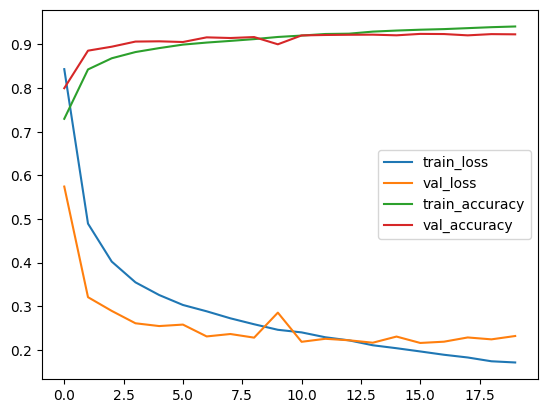

In [34]:
plt.plot(fit_history.history['loss'], label = 'train_loss')
plt.plot(fit_history.history['val_loss'], label = 'val_loss')
plt.plot(fit_history.history['accuracy'], label = 'train_accuracy')
plt.plot(fit_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

# 선생님과 함께 (조금 다른 방식의 코드)
# fashion-mnist 데이터 셋으로 cnn 모델 개발

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [36]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()

In [42]:
# 데이터 확인
# label_name
# 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot

print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))
print(X_train.max(), X_test.max())

(60000, 28, 28) (60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
255 255


In [41]:
# 데이터 전처리
X_train_scaled = X_train / 255.0  # X_train.max()
X_test_scaled = X_test / 255.0    # X_test.max()

print(X_train_scaled.max(), X_test_scaled.max())

1.0 1.0


In [50]:
# 모델 구조 설계 1
# Sequential()로 하면 정해진데로 써야함.

model = tf_keras.models.Sequential()
model.add(tf_keras.layers.Input(shape=(28, 28, 1)))
model.add(tf_keras.layers.Conv2D(filters=32,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
model.add(tf_keras.layers.MaxPool2D(pool_size=2))

model.add(tf_keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
model.add(tf_keras.layers.MaxPool2D(pool_size=2))

model.add(tf_keras.layers.Flatten())

model.add(tf_keras.layers.Dense(units=128, activation='relu'))
model.add(tf_keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# 모델 구조 설계 2 : 함수형 API 사용

input = tf_keras.layers.Input(shape=(28, 28, 1))
# input이라고 하는 독립적인 객체로 만들기
# input() # 함수를 호출하는 작업을 수행하는 것이 가능하도록 처리를 해주는게 가능하다
conv2d_1 = tf_keras.layers.Conv2D(filters=32,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  activation='relu')
# dropout > 여기다 쓰면 특별한 상황. 드롭아웃은 출력층 앞에 쓰는게 일반적 > conv층에서 건다면 dropout 아주 낮게 설정
# conv2d_1.__call__ # __call__ 함수가 제공되는 애들이 있음. 이건 conv2D_1()과 같음. 즉, conv2d_1() -> conv2d_1.__call__
maxpool2d_1 = tf_keras.layers.MaxPool2D(pool_size=2)
conv2d_2 = tf_keras.layers.Conv2D(filters=64,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  activation='relu')
maxpool2d_2 = tf_keras.layers.MaxPool2D(pool_size=2)

flatten = tf_keras.layers.Flatten()

dense_1 = tf_keras.layers.Dense(units=128, activation='relu')
# dropout
dropout = tf_keras.layers.Dropout(rate=0.2) # 권장은 0.2~0.5 unit이 많고, w가 많다면 dropout비율 올림. 혹은 과대 적합 강도에 따라 심하면 올림
output = tf_keras.layers.Dense(units=10, activation='softmax')

# 위는 시퀀셜을 만들어서 애들을 붙였는데, 지금은 그러지 않고 다 독립적으로 만듦.
# conv2d_1(input) -> conv2d_1.__call__(input)
# 개체를 마치 함수처럼 사용할 수 있게 함. 입출력이 있는 곳에는 다 함수를 만듦.
# 시퀀셜로 세트로 만들 수도 있지만, 지금처럼 조각내서 쓸 수있음. > 더 자유로움 > 층을 넣을지 말지
# 시퀀셜에서도 할 수 있지만, 지금 이 더 자유롭게 제어하므로 고급 모델을 사용할땐 이렇게함.
# 특히 입력이 여러개 혹은 출력이 여러개면 이렇게 써야만한다.
# 시퀀셜은 입력1, 출력1일때만 가능
# 근데 만약 입력1, 출력2라면 이렇게 함수형으로 써야한다.

output2 = conv2d_1(input)
output2 = maxpool2d_1(output2)
output2 = conv2d_2(output2)
output2 = maxpool2d_2(output2)
output2 = flatten(output2)
output2 = dense_1(output2)
# dropout
output2 = output(output2)

model2 = tf_keras.models.Model(input, output2)
model2.summary()
# 입력과 출력의 연쇄를 직접 만듦

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# 모델 학습 설계
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [54]:
# 모델 학습
fit_history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=20, validation_split=0.2)
fit_history2 = model2.fit(X_train_scaled, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9928 - loss: 0.0196 - val_accuracy: 0.9203 - val_loss: 0.4426
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9138 - val_loss: 0.4767
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0225 - val_accuracy: 0.9155 - val_loss: 0.4364
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9138 - val_loss: 0.4795
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9959 - loss: 0.0130 - val_accuracy: 0.9143 - val_loss: 0.5096
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0184 - val_accuracy: 0.9198 - val_loss: 0.4955
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9114 - val_loss: 0.5541
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.

In [55]:
print(model.evaluate(X_train_scaled, y_train), model.evaluate(X_test_scaled, y_test))   # 0.9785833358764648, 0.9120000004768372
print(model2.evaluate(X_train_scaled, y_train), model2.evaluate(X_test_scaled, y_test)) # 0.9794166684150696, 0.9150000214576721

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9927 - loss: 0.0333
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9052 - loss: 0.7252
[0.14942945539951324, 0.9780666828155518] [0.7194952964782715, 0.9074000120162964]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9903 - loss: 0.0400
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.7549
[0.1599699705839157, 0.9765833616256714] [0.7611481547355652, 0.9100000262260437]


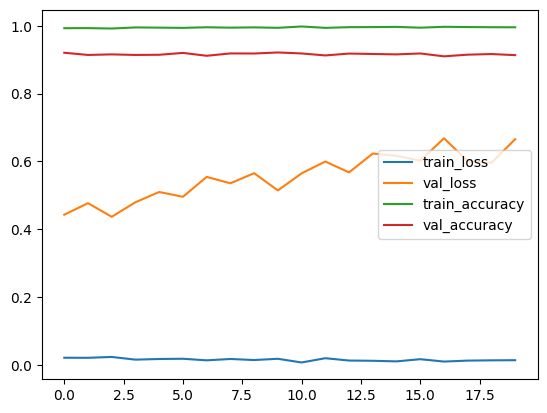

In [56]:
plt.plot(fit_history.history['loss'], label = 'train_loss')
plt.plot(fit_history.history['val_loss'], label = 'val_loss')
plt.plot(fit_history.history['accuracy'], label = 'train_accuracy')
plt.plot(fit_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

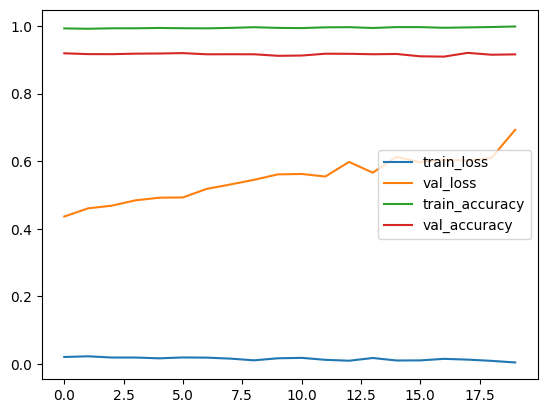

In [57]:
plt.plot(fit_history2.history['loss'], label = 'train_loss')
plt.plot(fit_history2.history['val_loss'], label = 'val_loss')
plt.plot(fit_history2.history['accuracy'], label = 'train_accuracy')
plt.plot(fit_history2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()